Physical activity prediction from multi sensor wearable devices
Group No: 63
Group Members: EG/2020/4030  Kumanyake H.P.
               EG/2020/4247  Udayanthika K.D.S

In [ ]:
import numpy as np 
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# pip install imbalanced-learn

In [6]:
df = pd.read_csv('dataset2.csv')

In [3]:
df.shape

(2864056, 33)

In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame with the target column 'label'
# Replace 'label' with your actual column name
target_column = 'activityID'

# Get unique classes in the target column
unique_classes = df[target_column].unique()

# Initialize an empty DataFrame to store the subset
dataset = pd.DataFrame()

# Specify the number of samples you want for each class (e.g., 25000 / number of classes)
samples_per_class = 75000 // len(unique_classes)

# Iterate through each class and append the specified number of samples to the subset
for class_label in unique_classes:
    class_subset = df[df[target_column] == class_label].head(samples_per_class)
    dataset = pd.concat([dataset, class_subset], ignore_index=True)

# Shuffle the subset to randomize the order
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)




In [8]:
dataset

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,lying,92.000000,30.8750,6.201530,5.09993,5.734940,0.012021,0.027837,-0.011241,-14.126300,...,-0.509284,-7.614590,-6.534370,-0.050191,-0.009597,-0.001369,-14.00740,45.52580,-6.50785,1
1,lying,101.000000,30.3750,-2.378020,8.71607,3.746830,0.924567,0.721641,0.180167,16.153900,...,9.776170,-1.809880,0.095308,0.005350,0.046369,0.021359,-60.45180,-35.78190,-58.48720,1
2,ascending stairs,144.000000,33.8125,-9.373440,2.59456,0.429758,-2.593620,-0.940224,-1.379220,47.611800,...,14.643800,0.521011,-5.464730,2.774930,1.411800,-3.920870,-46.17050,-4.26169,-10.24170,1
3,walking,123.000000,33.5000,2.465120,8.08405,5.207050,-0.003597,-0.026036,0.016062,4.512770,...,9.803230,-0.628271,-0.490591,-0.014442,0.044151,-0.021252,-56.26100,-29.10500,1.58242,1
4,standing,110.000000,32.7500,-7.239880,5.60379,3.607530,-0.051806,-0.329825,-0.381256,56.527200,...,8.862930,-3.206780,-0.175516,-1.784410,0.248812,0.183972,-72.89410,-3.51878,55.46380,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74992,ascending stairs,133.000000,33.8125,-7.550420,6.08664,2.177220,0.405908,0.283620,-0.654619,73.828200,...,3.225810,19.201000,-1.337130,0.122574,-0.134017,2.442270,-16.66540,-40.27660,57.08740,1
74993,lying,102.000000,30.4375,-0.735808,6.72016,6.857150,0.027419,0.044394,0.032946,-17.457200,...,9.857580,-0.975686,0.168145,0.001950,0.017560,0.049439,-57.09270,-43.51320,-58.47340,1
74994,Nordic walking,127.000000,32.5625,-1.474950,1.33154,1.899390,-0.401105,1.884180,-3.386000,-0.322336,...,13.613100,0.235040,-2.193410,-0.547226,1.332740,-2.336760,-46.17900,-40.77150,22.78920,1
74995,transient activities,102.000000,30.1250,2.196390,8.56761,3.892830,0.008266,-0.001268,0.027044,15.470500,...,9.697910,-1.618280,-0.061042,0.037276,0.035863,-0.015679,-59.86240,-37.78990,-58.38970,1


In [9]:
dataset['activityID'].value_counts()

activityID
lying                   5769
ascending stairs        5769
walking                 5769
standing                5769
cycling                 5769
Nordic walking          5769
vacuum cleaning         5769
running                 5769
sitting                 5769
transient activities    5769
rope jumping            5769
descending stairs       5769
ironing                 5769
Name: count, dtype: int64

In [10]:
#features of the dataset
dataset.columns

Index(['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z', 'PeopleId'],
      dtype='object')

In [11]:
#display Unique Values in dataframe
for col in dataset.columns:
    print('{} : {}'.format(col,dataset[col].unique()))

activityID : ['lying' 'ascending stairs' 'walking' 'standing' 'cycling'
 'Nordic walking' 'vacuum cleaning' 'running' 'sitting'
 'transient activities' 'rope jumping' 'descending stairs' 'ironing']
heart_rate : [ 92.         101.         144.         ... 165.09090909 136.2
 137.1       ]
hand temperature (°C) : [30.875   30.375   33.8125  33.5     32.75    32.      30.6875  30.5
 33.4375  32.5625  33.5625  31.      30.8125  32.0625  30.3125  30.1875
 30.75    30.25    32.625   32.125   30.5625  31.9375  32.5     33.1875
 33.875   30.9375  32.8125  33.25    30.4375  30.0625  30.625   33.375
 32.6875  30.125   33.75    30.      33.625   33.125   33.3125  30.96875]
hand acceleration X ±16g : [ 6.20153  -2.37802  -9.37344  ... -0.735808 -1.47495   2.56807 ]
hand acceleration Y ±16g : [5.09993 8.71607 2.59456 ... 1.33154 8.56761 7.55035]
hand acceleration Z ±16g : [5.73494  3.74683  0.429758 ... 1.89939  3.89283  5.01796 ]
hand gyroscope X : [ 0.0120213   0.924567   -2.59362    ... -0.40110

In [12]:
# Drop columns that aren’t useful
dataset.drop(['PeopleId'], axis=1, inplace=True)
display(dataset)

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle temperature (°C),ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z
0,lying,92.000000,30.8750,6.201530,5.09993,5.734940,0.012021,0.027837,-0.011241,-14.126300,...,31.2500,-0.509284,-7.614590,-6.534370,-0.050191,-0.009597,-0.001369,-14.00740,45.52580,-6.50785
1,lying,101.000000,30.3750,-2.378020,8.71607,3.746830,0.924567,0.721641,0.180167,16.153900,...,30.7500,9.776170,-1.809880,0.095308,0.005350,0.046369,0.021359,-60.45180,-35.78190,-58.48720
2,ascending stairs,144.000000,33.8125,-9.373440,2.59456,0.429758,-2.593620,-0.940224,-1.379220,47.611800,...,34.8750,14.643800,0.521011,-5.464730,2.774930,1.411800,-3.920870,-46.17050,-4.26169,-10.24170
3,walking,123.000000,33.5000,2.465120,8.08405,5.207050,-0.003597,-0.026036,0.016062,4.512770,...,34.8750,9.803230,-0.628271,-0.490591,-0.014442,0.044151,-0.021252,-56.26100,-29.10500,1.58242
4,standing,110.000000,32.7500,-7.239880,5.60379,3.607530,-0.051806,-0.329825,-0.381256,56.527200,...,33.1250,8.862930,-3.206780,-0.175516,-1.784410,0.248812,0.183972,-72.89410,-3.51878,55.46380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74992,ascending stairs,133.000000,33.8125,-7.550420,6.08664,2.177220,0.405908,0.283620,-0.654619,73.828200,...,34.8750,3.225810,19.201000,-1.337130,0.122574,-0.134017,2.442270,-16.66540,-40.27660,57.08740
74993,lying,102.000000,30.4375,-0.735808,6.72016,6.857150,0.027419,0.044394,0.032946,-17.457200,...,30.8125,9.857580,-0.975686,0.168145,0.001950,0.017560,0.049439,-57.09270,-43.51320,-58.47340
74994,Nordic walking,127.000000,32.5625,-1.474950,1.33154,1.899390,-0.401105,1.884180,-3.386000,-0.322336,...,34.3125,13.613100,0.235040,-2.193410,-0.547226,1.332740,-2.336760,-46.17900,-40.77150,22.78920
74995,transient activities,102.000000,30.1250,2.196390,8.56761,3.892830,0.008266,-0.001268,0.027044,15.470500,...,30.5000,9.697910,-1.618280,-0.061042,0.037276,0.035863,-0.015679,-59.86240,-37.78990,-58.38970


In [13]:
#check the features count
len(dataset.columns)

32

In [14]:
#Rows and Columns of the dataset
dataset.shape

(74997, 32)

In [15]:
# Check the duplicate values
dataset['activityID'].unique(), dataset['activityID'].nunique()

(array(['lying', 'ascending stairs', 'walking', 'standing', 'cycling',
        'Nordic walking', 'vacuum cleaning', 'running', 'sitting',
        'transient activities', 'rope jumping', 'descending stairs',
        'ironing'], dtype=object),
 13)

In [16]:
# describe the dataaset
print(dataset.describe())

         heart_rate  hand temperature (°C)  hand acceleration X ±16g  \
count  74997.000000           74997.000000              74997.000000   
mean     118.757617              32.363142                 -4.466328   
std       18.572444               1.253744                  6.517689   
min       87.000000              30.000000                -57.534900   
25%      103.000000              31.000000                 -8.306500   
50%      121.000000              32.625000                 -3.790180   
75%      128.000000              33.500000                  0.024558   
max      174.000000              33.875000                 20.253400   

       hand acceleration Y ±16g  hand acceleration Z ±16g  hand gyroscope X  \
count              74997.000000              74997.000000      74997.000000   
mean                   6.313723                  3.698609          0.094925   
std                    5.545653                  3.327869          1.178198   
min                  -81.234400    

### Delete Duplicate Rows 

In [17]:
#Duplicate rows
duplicate_rows = dataset.duplicated().sum()
print("Count of duplicate rows:", duplicate_rows)

Count of duplicate rows: 0


In [18]:
#check null values of dataframe
null_values = dataset.isnull().sum()
print(null_values)

activityID                   0
heart_rate                   0
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         0
ankle magnetometer Z         0
dtype: i

### Remove Null Values 

In [19]:
# Display rows with null values
rows_with_null = dataset[dataset.isnull().any(axis=1)]

print("Rows with null values:")
print(rows_with_null)

Rows with null values:
Empty DataFrame
Columns: [activityID, heart_rate, hand temperature (°C), hand acceleration X ±16g, hand acceleration Y ±16g, hand acceleration Z ±16g, hand gyroscope X, hand gyroscope Y, hand gyroscope Z, hand magnetometer X, hand magnetometer Y, hand magnetometer Z, chest temperature (°C), chest acceleration X ±16g, chest acceleration Y ±16g, chest acceleration Z ±16g, chest gyroscope X, chest gyroscope Y, chest gyroscope Z, chest magnetometer X, chest magnetometer Y, chest magnetometer Z, ankle temperature (°C), ankle acceleration X ±16g, ankle acceleration Y ±16g, ankle acceleration Z ±16g, ankle gyroscope X, ankle gyroscope Y, ankle gyroscope Z, ankle magnetometer X, ankle magnetometer Y, ankle magnetometer Z]
Index: []

[0 rows x 32 columns]


In [20]:
# Example 4: Drop rows that has NaN values on selected columns
dataset=dataset.dropna(subset=['heart_rate'])

In [21]:
#check null values of dataframe
null_values = dataset.isnull().sum()
print(null_values)

activityID                   0
heart_rate                   0
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         0
ankle magnetometer Z         0
dtype: i

In [22]:
X = dataset.drop(columns='activityID')  
y = dataset['activityID']

In [23]:
X

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle temperature (°C),ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z
0,92.000000,30.8750,6.201530,5.09993,5.734940,0.012021,0.027837,-0.011241,-14.126300,14.42220,...,31.2500,-0.509284,-7.614590,-6.534370,-0.050191,-0.009597,-0.001369,-14.00740,45.52580,-6.50785
1,101.000000,30.3750,-2.378020,8.71607,3.746830,0.924567,0.721641,0.180167,16.153900,-67.42130,...,30.7500,9.776170,-1.809880,0.095308,0.005350,0.046369,0.021359,-60.45180,-35.78190,-58.48720
2,144.000000,33.8125,-9.373440,2.59456,0.429758,-2.593620,-0.940224,-1.379220,47.611800,6.74491,...,34.8750,14.643800,0.521011,-5.464730,2.774930,1.411800,-3.920870,-46.17050,-4.26169,-10.24170
3,123.000000,33.5000,2.465120,8.08405,5.207050,-0.003597,-0.026036,0.016062,4.512770,-55.88270,...,34.8750,9.803230,-0.628271,-0.490591,-0.014442,0.044151,-0.021252,-56.26100,-29.10500,1.58242
4,110.000000,32.7500,-7.239880,5.60379,3.607530,-0.051806,-0.329825,-0.381256,56.527200,-42.79730,...,33.1250,8.862930,-3.206780,-0.175516,-1.784410,0.248812,0.183972,-72.89410,-3.51878,55.46380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74992,133.000000,33.8125,-7.550420,6.08664,2.177220,0.405908,0.283620,-0.654619,73.828200,20.68890,...,34.8750,3.225810,19.201000,-1.337130,0.122574,-0.134017,2.442270,-16.66540,-40.27660,57.08740
74993,102.000000,30.4375,-0.735808,6.72016,6.857150,0.027419,0.044394,0.032946,-17.457200,-62.29060,...,30.8125,9.857580,-0.975686,0.168145,0.001950,0.017560,0.049439,-57.09270,-43.51320,-58.47340
74994,127.000000,32.5625,-1.474950,1.33154,1.899390,-0.401105,1.884180,-3.386000,-0.322336,-62.56200,...,34.3125,13.613100,0.235040,-2.193410,-0.547226,1.332740,-2.336760,-46.17900,-40.77150,22.78920
74995,102.000000,30.1250,2.196390,8.56761,3.892830,0.008266,-0.001268,0.027044,15.470500,-69.08270,...,30.5000,9.697910,-1.618280,-0.061042,0.037276,0.035863,-0.015679,-59.86240,-37.78990,-58.38970


In [24]:
y

0                       lying
1                       lying
2            ascending stairs
3                     walking
4                    standing
                 ...         
74992        ascending stairs
74993                   lying
74994          Nordic walking
74995    transient activities
74996                 sitting
Name: activityID, Length: 74997, dtype: object

### Checking the correlation 

In [25]:
X.corr()

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle temperature (°C),ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z
heart_rate,1.000000,-0.079362,-0.336681,0.072107,-0.293521,0.067737,0.108116,0.004779,0.303757,-0.072480,...,0.435946,0.225270,0.200468,0.055999,0.025575,0.030664,0.002619,-0.048244,-0.199460,0.166811
hand temperature (°C),-0.079362,1.000000,-0.343758,-0.253160,0.050373,-0.070003,-0.032988,-0.002574,0.175241,0.095484,...,0.786077,0.134766,0.057647,0.071921,-0.009745,-0.002253,0.001040,0.053797,0.055805,0.297376
hand acceleration X ±16g,-0.336681,-0.343758,1.000000,-0.117508,0.031974,-0.005999,-0.041734,0.128338,-0.404265,0.018090,...,-0.471076,-0.271728,-0.082162,-0.039950,0.044988,-0.140717,0.210087,0.046851,0.186022,-0.192055
hand acceleration Y ±16g,0.072107,-0.253160,-0.117508,1.000000,0.067471,0.179235,-0.006208,0.002538,-0.032068,-0.174258,...,-0.154901,0.033691,0.105690,0.021831,0.051808,-0.045684,-0.090202,-0.022684,-0.073819,-0.109510
hand acceleration Z ±16g,-0.293521,0.050373,0.031974,0.067471,1.000000,-0.030107,-0.019865,-0.230088,-0.167602,0.223750,...,-0.066453,-0.073629,-0.062644,-0.054900,-0.000663,0.025627,-0.030267,0.140814,0.136443,0.039441
hand gyroscope X,0.067737,-0.070003,-0.005999,0.179235,-0.030107,1.000000,-0.310522,-0.264416,0.092821,0.043021,...,-0.007346,-0.022962,-0.034883,-0.012048,0.034968,-0.147031,0.135000,0.036592,-0.090138,0.004187
hand gyroscope Y,0.108116,-0.032988,-0.041734,-0.006208,-0.019865,-0.310522,1.000000,0.183702,-0.101175,-0.080201,...,0.028429,0.085674,0.028554,0.007245,0.032187,0.099589,-0.151933,-0.050498,-0.003640,0.012185
hand gyroscope Z,0.004779,-0.002574,0.128338,0.002538,-0.230088,-0.264416,0.183702,1.000000,-0.043454,-0.025136,...,-0.000594,-0.092486,0.068666,0.070546,0.005110,-0.001749,-0.075162,-0.059078,0.127894,0.064355
hand magnetometer X,0.303757,0.175241,-0.404265,-0.032068,-0.167602,0.092821,-0.101175,-0.043454,1.000000,0.080204,...,0.283227,0.148220,0.183388,0.167830,0.066246,-0.141595,0.111277,-0.068099,-0.402566,-0.058058
hand magnetometer Y,-0.072480,0.095484,0.018090,-0.174258,0.223750,0.043021,-0.080201,-0.025136,0.080204,1.000000,...,-0.006849,-0.257308,-0.053095,-0.166500,0.043610,-0.055751,0.060321,0.389641,0.275978,-0.059582


<Axes: >

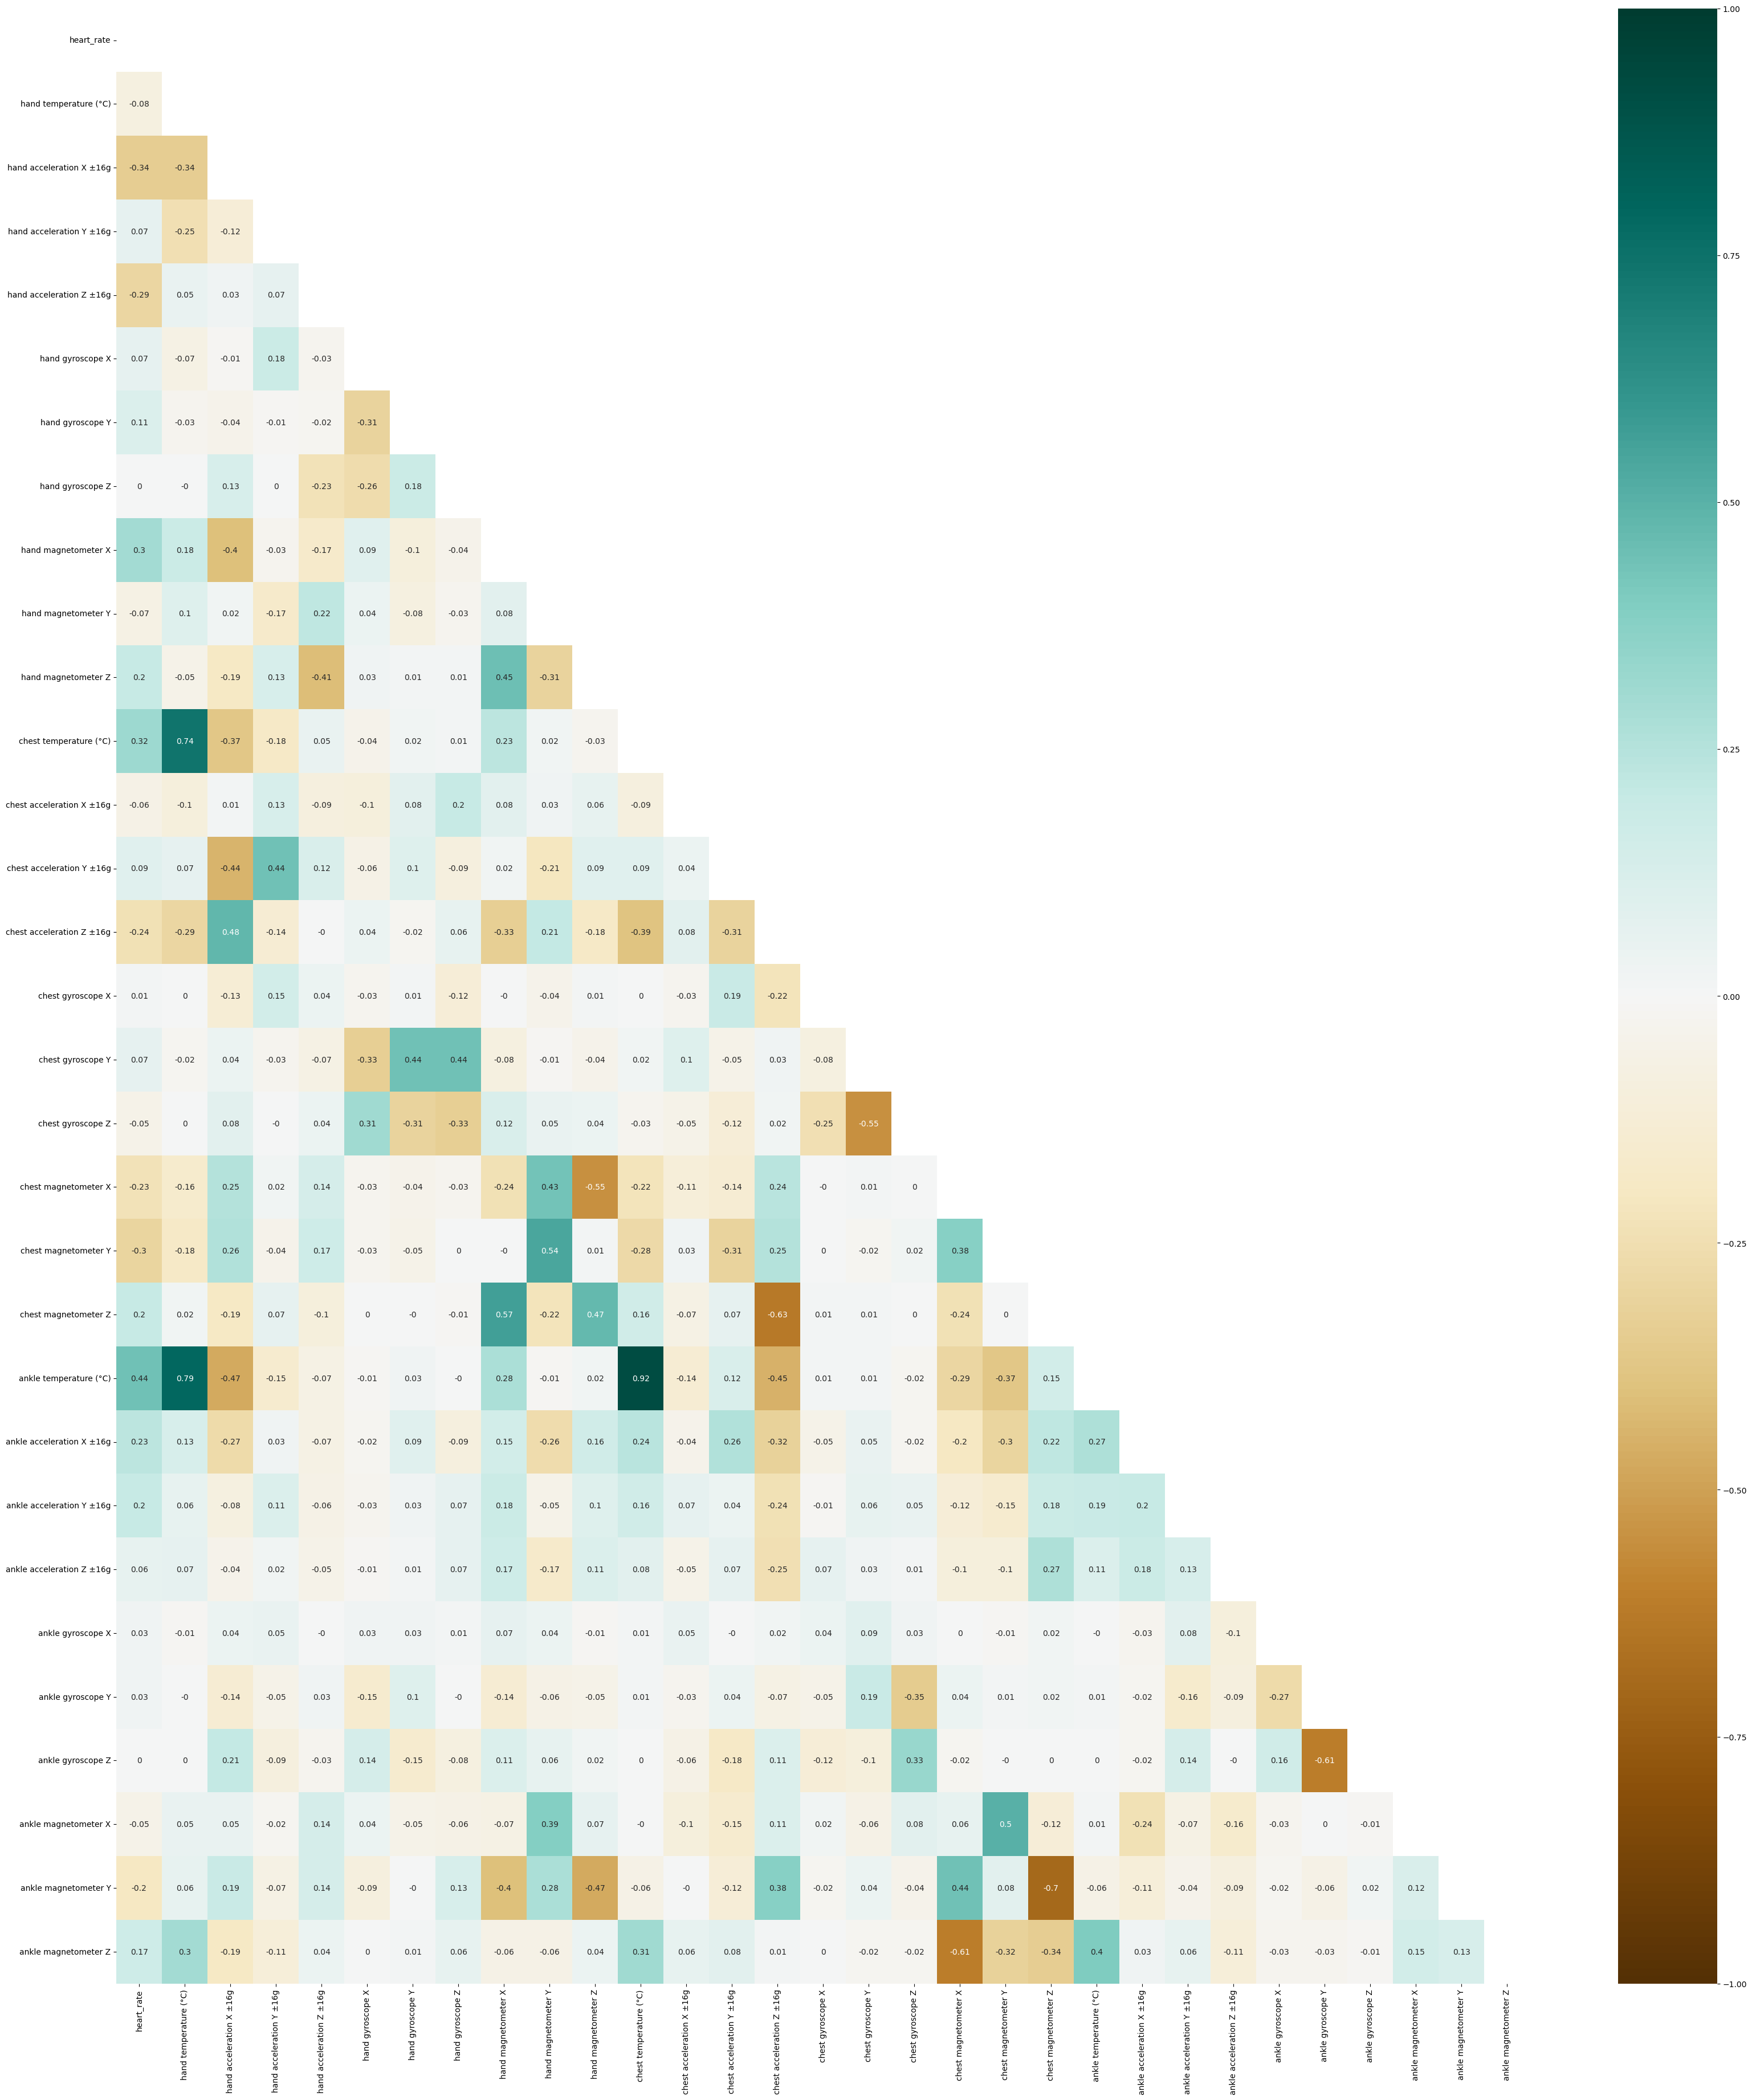

In [26]:
# a heatmap visualization of the correlation matrix
plt.figure(figsize=(40,45))
matrix = X.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype= bool))
sns.heatmap(matrix, annot=True, vmin=-1, vmax=1, mask=mask, cmap='BrBG')

In [27]:
X.columns

Index(['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g',
       'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
       'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
       'hand magnetometer X', 'hand magnetometer Y', 'hand magnetometer Z',
       'chest temperature (°C)', 'chest acceleration X ±16g',
       'chest acceleration Y ±16g', 'chest acceleration Z ±16g',
       'chest gyroscope X', 'chest gyroscope Y', 'chest gyroscope Z',
       'chest magnetometer X', 'chest magnetometer Y', 'chest magnetometer Z',
       'ankle temperature (°C)', 'ankle acceleration X ±16g',
       'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
       'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
       'ankle magnetometer X', 'ankle magnetometer Y', 'ankle magnetometer Z'],
      dtype='object')

In [28]:
#remove ankle temperature,chest temperature since there correlation is 1
X.drop(['chest temperature (°C)','ankle temperature (°C)'], axis=1, inplace=True)

In [29]:
X.shape

(74997, 29)

In [30]:
X

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,chest magnetometer Z,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z
0,92.000000,30.8750,6.201530,5.09993,5.734940,0.012021,0.027837,-0.011241,-14.126300,14.42220,...,-54.9489,-0.509284,-7.614590,-6.534370,-0.050191,-0.009597,-0.001369,-14.00740,45.52580,-6.50785
1,101.000000,30.3750,-2.378020,8.71607,3.746830,0.924567,0.721641,0.180167,16.153900,-67.42130,...,43.4543,9.776170,-1.809880,0.095308,0.005350,0.046369,0.021359,-60.45180,-35.78190,-58.48720
2,144.000000,33.8125,-9.373440,2.59456,0.429758,-2.593620,-0.940224,-1.379220,47.611800,6.74491,...,20.8036,14.643800,0.521011,-5.464730,2.774930,1.411800,-3.920870,-46.17050,-4.26169,-10.24170
3,123.000000,33.5000,2.465120,8.08405,5.207050,-0.003597,-0.026036,0.016062,4.512770,-55.88270,...,30.1832,9.803230,-0.628271,-0.490591,-0.014442,0.044151,-0.021252,-56.26100,-29.10500,1.58242
4,110.000000,32.7500,-7.239880,5.60379,3.607530,-0.051806,-0.329825,-0.381256,56.527200,-42.79730,...,13.0489,8.862930,-3.206780,-0.175516,-1.784410,0.248812,0.183972,-72.89410,-3.51878,55.46380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74992,133.000000,33.8125,-7.550420,6.08664,2.177220,0.405908,0.283620,-0.654619,73.828200,20.68890,...,46.4894,3.225810,19.201000,-1.337130,0.122574,-0.134017,2.442270,-16.66540,-40.27660,57.08740
74993,102.000000,30.4375,-0.735808,6.72016,6.857150,0.027419,0.044394,0.032946,-17.457200,-62.29060,...,43.9888,9.857580,-0.975686,0.168145,0.001950,0.017560,0.049439,-57.09270,-43.51320,-58.47340
74994,127.000000,32.5625,-1.474950,1.33154,1.899390,-0.401105,1.884180,-3.386000,-0.322336,-62.56200,...,22.6918,13.613100,0.235040,-2.193410,-0.547226,1.332740,-2.336760,-46.17900,-40.77150,22.78920
74995,102.000000,30.1250,2.196390,8.56761,3.892830,0.008266,-0.001268,0.027044,15.470500,-69.08270,...,43.4171,9.697910,-1.618280,-0.061042,0.037276,0.035863,-0.015679,-59.86240,-37.78990,-58.38970


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Specify the number of samples you want for training (e.g., 25000)
# num_samples = 25000

# Use train_test_split with stratify
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_samples, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [32]:
y_train.value_counts()

activityID
standing                4616
vacuum cleaning         4616
ironing                 4615
lying                   4615
cycling                 4615
Nordic walking          4615
rope jumping            4615
walking                 4615
ascending stairs        4615
transient activities    4615
descending stairs       4615
sitting                 4615
running                 4615
Name: count, dtype: int64

### Label encoding for target column 

In [33]:
# Training set
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Testing set
y_test_encoded = label_encoder.transform(y_test)

### Normaliization 

In [34]:
# Use StandardScaler to scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays to DataFrames
scaled_df_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
scaled_df_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [35]:
scaled_df_train

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,chest magnetometer Z,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z
0,-1.117643,0.707358,0.333401,-0.763024,1.642170,0.179142,-1.315734,-0.503439,-1.122654,0.363974,...,-0.726302,0.147700,-0.012975,0.403777,0.436187,-0.753586,0.017497,-0.486339,0.046085,0.979724
1,-0.740302,-1.486143,0.761727,-0.216314,1.385469,-0.012564,-0.134105,0.025100,-1.594338,1.999286,...,-2.166008,-1.368285,-0.974950,-0.551604,-0.202641,-0.160570,0.363694,1.524219,1.453704,-0.635787
2,0.283910,-0.289687,-0.126648,-0.289887,1.394564,-0.848878,0.299085,0.401588,-0.484531,-0.227783,...,0.650041,-1.031425,-0.015419,0.197183,0.332031,0.167613,0.437791,-0.242199,-0.589789,0.355522
3,0.068287,-0.289687,0.604967,-0.742191,0.909373,-0.572666,0.101320,-0.059554,-0.815941,-0.561938,...,0.579472,0.284184,0.227967,0.530449,-0.199512,0.536242,-0.661164,-0.376518,-0.244511,0.490577
4,-0.093431,0.208835,0.027496,-0.105119,0.530106,-0.038880,-0.316161,-0.030066,0.968072,0.128175,...,0.125540,0.061793,0.065227,0.401235,0.018644,0.027709,-0.000083,-0.270116,1.060798,-0.767909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59992,-1.441078,-0.289687,0.258206,0.587713,-0.774731,-0.213844,0.161056,-0.093668,1.416327,-0.123676,...,1.785535,0.004934,0.153120,0.074883,0.015576,0.113492,-0.004265,-0.503634,-1.848946,-1.646517
59993,0.122193,0.856915,-0.301013,0.111016,-0.394965,0.896951,-0.225238,-0.866755,1.150419,0.251855,...,-0.663316,2.710649,0.439157,-1.199542,2.002692,-2.863435,3.511121,0.079058,1.065477,0.859457
59994,-0.632490,-0.339540,0.738125,0.497831,-0.193108,0.321104,-0.202800,0.194114,0.897419,-0.436080,...,1.258054,-0.015104,0.245913,-0.457201,0.667314,-0.502186,-0.036308,-0.894550,-1.948203,-1.356095
59995,1.847182,1.156029,-1.559385,-0.273387,-0.522255,-3.362182,0.815467,1.036087,0.691308,1.223317,...,0.264126,0.382535,0.497025,0.105982,-0.164973,0.112806,-0.122057,-0.494458,0.581626,-0.768059


In [36]:
scaled_df_test

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,chest magnetometer Z,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z
0,-0.848114,0.358392,-0.600798,-0.511448,-0.064636,-0.089534,-0.066730,0.013071,0.968181,-0.569645,...,0.021665,-0.015075,-0.352669,0.130680,-0.009598,-0.019112,-0.018040,-0.903530,-0.026430,1.511658
1,-0.470772,0.308540,-0.609196,-0.464537,-0.227160,-0.376338,-0.004814,0.171069,1.018977,-0.454393,...,0.046535,0.013762,-0.374452,0.141295,0.030423,-0.189163,-0.088376,-0.950187,-0.128961,1.431662
2,1.254217,-1.735404,-2.824335,2.905231,0.371659,1.859845,0.076018,-0.411864,1.039100,-0.232718,...,0.426399,-0.844411,0.754349,1.024648,2.301818,-0.825525,-1.441143,0.329556,-0.906105,0.893514
3,-1.117643,0.707358,0.612957,-0.119066,1.473139,0.471019,-1.722721,-0.151526,-0.831761,0.261871,...,-0.608546,0.021695,-0.114009,-0.176531,0.038387,0.039444,0.009271,0.177503,0.308635,1.412795
4,0.176099,0.906768,-0.063772,-0.712949,-1.135567,0.123378,-0.489072,1.718043,-0.964959,-1.884749,...,-1.123046,-0.000385,0.024407,-0.178824,-0.331994,0.315224,-0.177005,-0.371651,0.610864,1.139756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.146405,-1.137177,1.912225,-0.131695,-1.196660,0.311272,-1.189193,0.007587,0.421789,-0.949491,...,-0.354498,2.742020,3.271469,0.755808,2.373207,-3.056809,2.984029,-1.554645,1.314093,0.471120
14996,0.499534,1.156029,-0.045514,-0.586907,-0.476115,0.498230,0.012257,-0.405093,1.380603,2.107827,...,1.208175,-0.357680,0.275913,0.047386,-0.240836,0.401363,-0.332899,0.502621,-1.406516,0.543150
14997,-0.794208,0.657506,-0.615288,-0.648235,-0.180013,-0.864322,-0.883844,1.196474,-0.399115,1.204610,...,-0.900533,-0.039436,0.016875,-0.434787,-0.340682,0.361021,-0.216859,-0.809906,0.489040,-0.150759
14998,-0.039525,0.208835,-0.994180,-0.111143,0.199311,-0.290161,0.432712,-2.278652,1.077987,1.852165,...,0.636968,0.324782,-0.216915,0.399785,-0.581587,1.053065,-0.534931,-0.374485,-0.101483,-1.075189


SVM MODEL TRAIN

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [35]:
params_grid

[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]},
 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [36]:
# Performing CV to tune parameters for the best SVM fit
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [40]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(label_encoder.inverse_transform(Y_pred))

Best score for training data: 0.9988332791621524 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [38]:
# Generate a classification report
report = classification_report(y_test_encoded, Y_pred)

In [39]:


print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1154
           1       1.00      1.00      1.00      1154
           2       1.00      1.00      1.00      1154
           3       1.00      1.00      1.00      1154
           4       1.00      1.00      1.00      1154
           5       1.00      0.99      0.99      1154
           6       1.00      1.00      1.00      1154
           7       1.00      1.00      1.00      1154
           8       1.00      1.00      1.00      1154
           9       1.00      1.00      1.00      1153
          10       0.99      1.00      0.99      1154
          11       1.00      1.00      1.00      1153
          12       1.00      1.00      1.00      1154

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000




 KNN MODEL TRAIN

In [37]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC


In [38]:


from sklearn.model_selection import cross_val_score
import numpy as np

# Create a list of possible n_neighbors values
neighbors = list(range(1, 21, 2))  # Considering odd values

# Empty list to store cross-validation scores
cv_scores = []

# Perform cross-validation for each n_neighbors value
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal n_neighbors value
optimal_k = neighbors[np.argmax(cv_scores)]
print("Optimal number of neighbors:", optimal_k)

Optimal number of neighbors: 1


In [40]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier on the training data
knn_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy of the trained KNN classifier:", accuracy)

Accuracy of the trained KNN classifier: 0.9989333333333333
